Import dataset

In [65]:
from ucimlrepo import fetch_ucirepo
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
  
# fetch dataset 
wine_quality = fetch_ucirepo(id=186).data.original
color = wine_quality['color'] #0 red 1 white
color = np.where(color == 'red', 0, 1) # convert to numerical values
y = wine_quality['quality']
X = wine_quality.drop(columns=['quality', 'color'])
print(len(X), "samples")

6497 samples


No missing values

In [66]:
X.isnull().sum().sum()

0

In [67]:
X["free_sulfur_dioxide"] = X["free_sulfur_dioxide"] / X["total_sulfur_dioxide"]

In [68]:
X

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,0.323529,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,0.373134,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,0.277778,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,0.283333,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,0.323529,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,0.260870,92.0,0.99114,3.27,0.50,11.2
6493,6.6,0.32,0.36,8.0,0.047,0.339286,168.0,0.99490,3.15,0.46,9.6
6494,6.5,0.24,0.19,1.2,0.041,0.270270,111.0,0.99254,2.99,0.46,9.4
6495,5.5,0.29,0.30,1.1,0.022,0.181818,110.0,0.98869,3.34,0.38,12.8


In [69]:
# Percentage of white and red wines
white_percentage = np.sum(color == 1) / len(color) * 100
red_percentage = np.sum(color == 0) / len(color) * 100
print(f"Percentage of white wines: {white_percentage:.2f}%")
print(f"Percentage of red wines: {red_percentage:.2f}%")

Percentage of white wines: 75.39%
Percentage of red wines: 24.61%


C:\Users\Çağan\AppData\Local\Temp\ipykernel_6680\2621958098.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


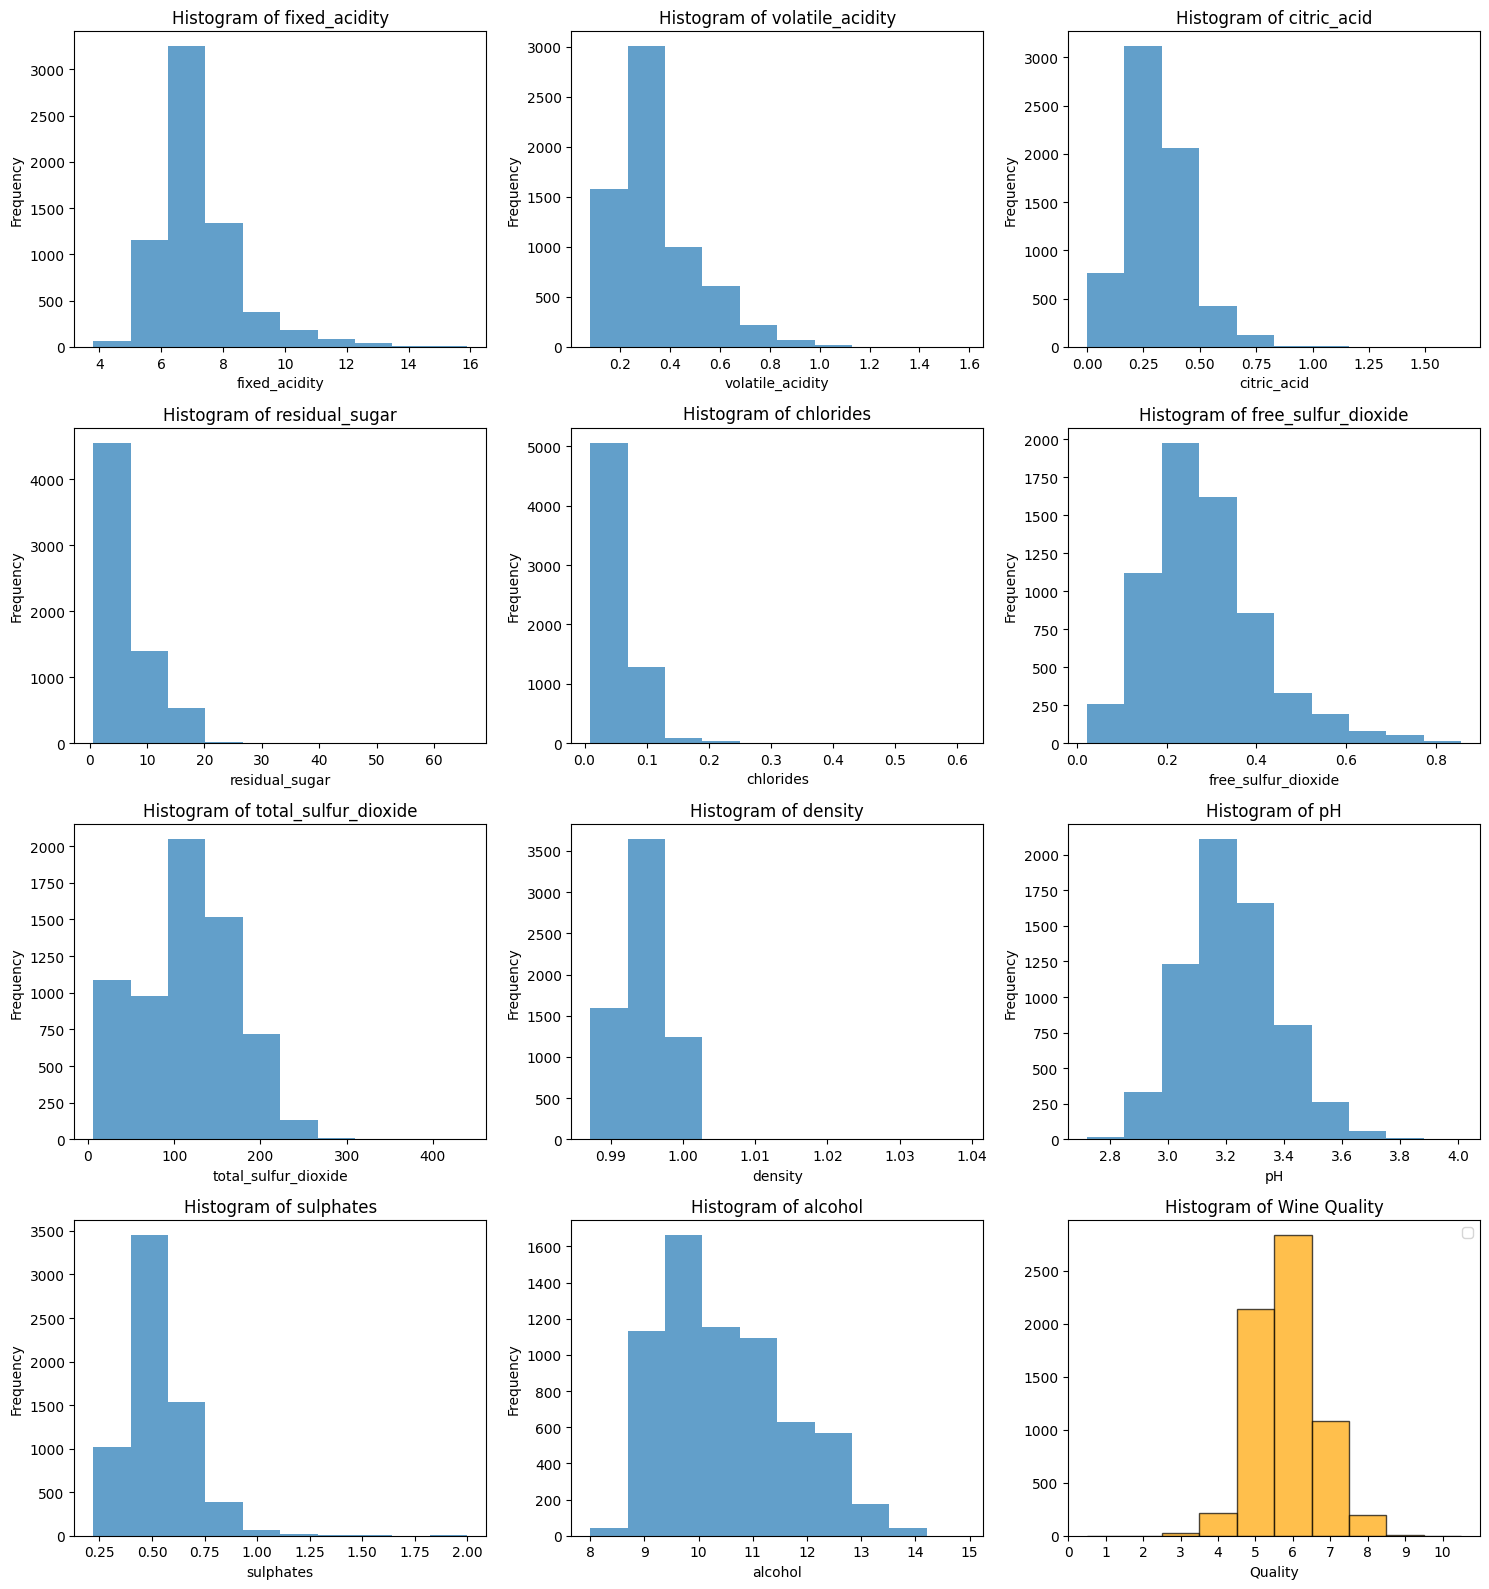

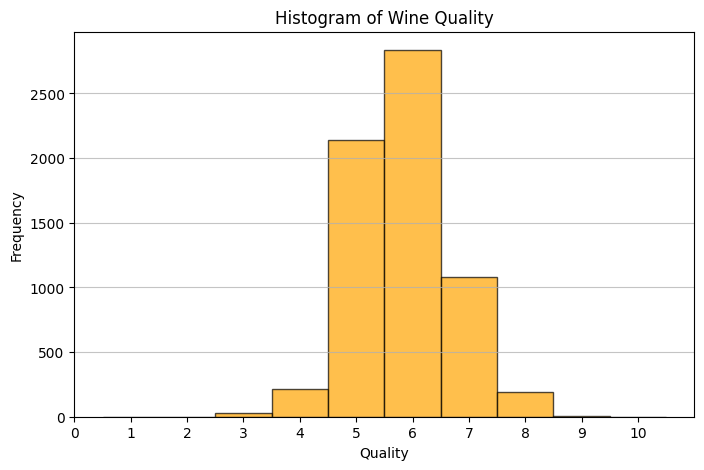

In [70]:
# Plot histogram for each feature and quality in a grid layout
def plot_histograms(X, y):
    num_features = X.shape[1]
    num_rows = (num_features + 2) // 3  # 3 plots per row
    fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows * 4))
    
    for i, feature in enumerate(X.columns):
        ax = axes[i // 3, i % 3]
        ax.hist(X[feature], bins=10, alpha=0.7, label='Feature')
        ax.set_title(f'Histogram of {feature}')
        ax.set_xlabel(feature)
        ax.set_ylabel('Frequency')
    # Add quality distribution
    ax = axes[-1, -1]  # Last subplot
    # Histogram binned by discrete quality values between 0 and 10
    ax.hist(y, bins=np.arange(0.5, 11.5, 1), alpha=0.7, color='orange', edgecolor='black')
    # Set x-ticks to show quality values
    ax.set_xticks(np.arange(0, 11, 1))
    ax.set_title('Histogram of Wine Quality')
    ax.set_xlabel('Quality')
    
    plt.tight_layout()
    plt.legend()
    # save the figure
    plt.savefig('wine_quality_histograms.png')
    plt.show()
plot_histograms(X, y)

# just generate the quality distribution plot
def plot_quality_distribution(y):
    plt.figure(figsize=(8, 5))
    plt.hist(y, bins=np.arange(0.5, 11.5, 1), alpha=0.7, color='orange', edgecolor='black')
    plt.xticks(np.arange(0, 11, 1))
    plt.title('Histogram of Wine Quality')
    plt.xlabel('Quality')
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.savefig('wine_quality_distribution.png')
    plt.show()
plot_quality_distribution(y)

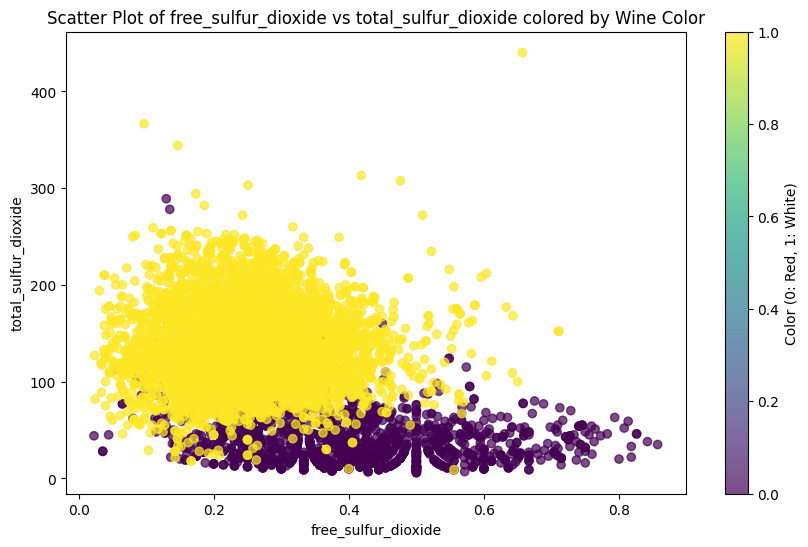

In [71]:
def scatter_plot(X, y, feature1, feature2, color_feature):
    df = pd.DataFrame(X, columns=X.columns)
    df['quality'] = y
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(df[feature1], df[feature2], c=color_feature, cmap='viridis', alpha=0.7)
    plt.colorbar(scatter, label='Color (0: Red, 1: White)')
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.title(f'Scatter Plot of {feature1} vs {feature2} colored by Wine Color')
    plt.show()
scatter_plot(X, y, 'free_sulfur_dioxide', 'total_sulfur_dioxide', color)

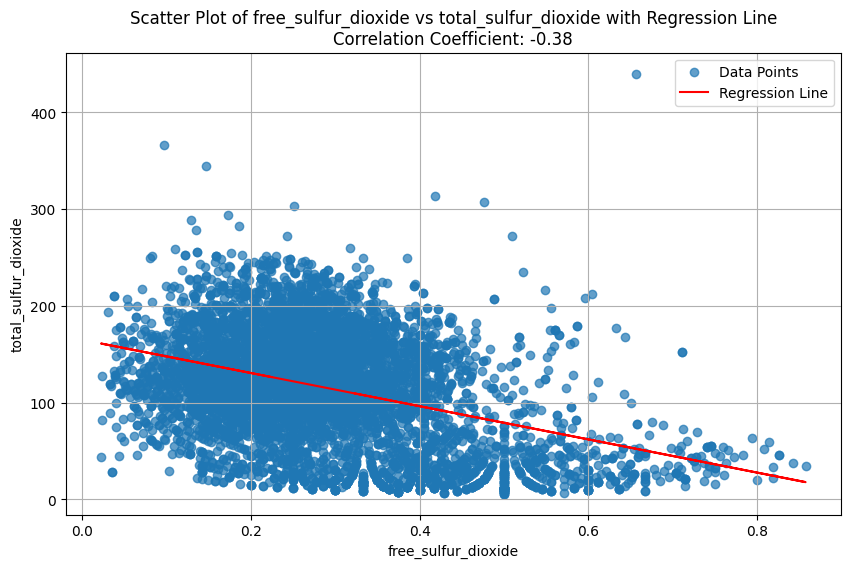

In [72]:
# Make scatter plot for alcohol vs quality with regression line and correlation coefficient
def scatter_plot_with_regression(X, y, feature1, feature2):
    df = pd.DataFrame(X, columns=X.columns)
    df['quality'] = y
    plt.figure(figsize=(10, 6))
    plt.scatter(df[feature1], df[feature2], alpha=0.7, label='Data Points')
    
    # Fit a linear regression model
    m, b = np.polyfit(df[feature1], df[feature2], 1)
    plt.plot(df[feature1], m * df[feature1] + b, color='red', label='Regression Line')
    
    # Calculate correlation coefficient
    corr_coef = np.corrcoef(df[feature1], df[feature2])[0, 1]
    
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.title(f'Scatter Plot of {feature1} vs {feature2} with Regression Line\nCorrelation Coefficient: {corr_coef:.2f}')
    plt.legend()
    plt.grid()
    # Save the plot
    plt.savefig(f'scatter_{feature1}_vs_{feature2}.png')
    plt.show()
scatter_plot_with_regression(X, y, 'free_sulfur_dioxide', 'total_sulfur_dioxide')

In [73]:
from sklearn.preprocessing import StandardScaler
# Scale the remaining features
X_scaled = StandardScaler().fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

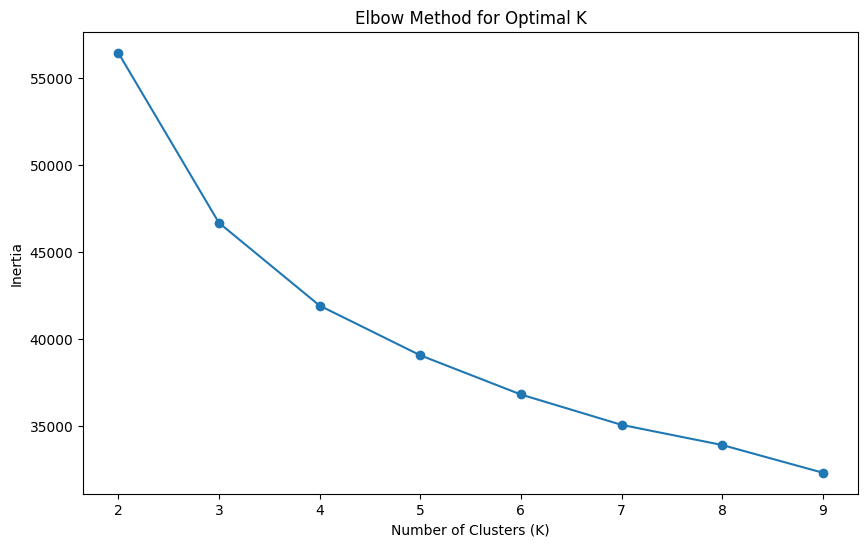

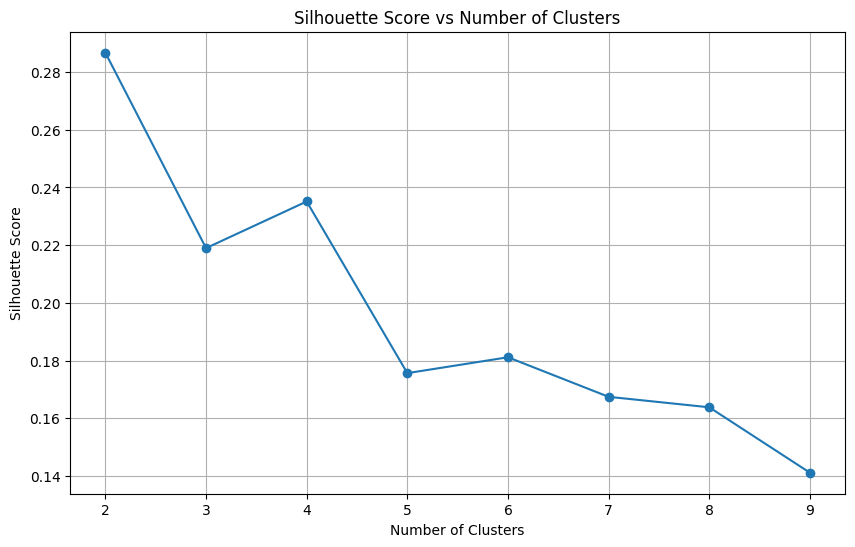

In [76]:
from sklearn.cluster import KMeans
k_range = range(2, 10)
#Calculate elbow method to find optimal number of clusters
inertia = []
silhouette_scores = []
from sklearn.metrics import silhouette_score
for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    # Calculate silhouette score
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.predict(X_scaled)))
plt.figure(figsize=(10, 6))
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.plot(k_range, inertia, marker='o')
# Save the elbow method plot
plt.savefig('elbow_method.png', dpi=300, bbox_inches='tight')
# Silhouette score to find optimal number of clusters
plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(k_range)
plt.grid()
# Show all plots
plt.show()

Explained variance by PCA components: 0.47682845459380496


C:\Users\Çağan\AppData\Local\Temp\ipykernel_6680\2973796330.py:16: RuntimeWarning: Mean of empty slice.
  plt.text(X_pca[assigned_clusters == i, 0].mean(),
C:\Users\Çağan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\Çağan\AppData\Local\Temp\ipykernel_6680\2973796330.py:17: RuntimeWarning: Mean of empty slice.
  X_pca[assigned_clusters == i, 1].mean(),


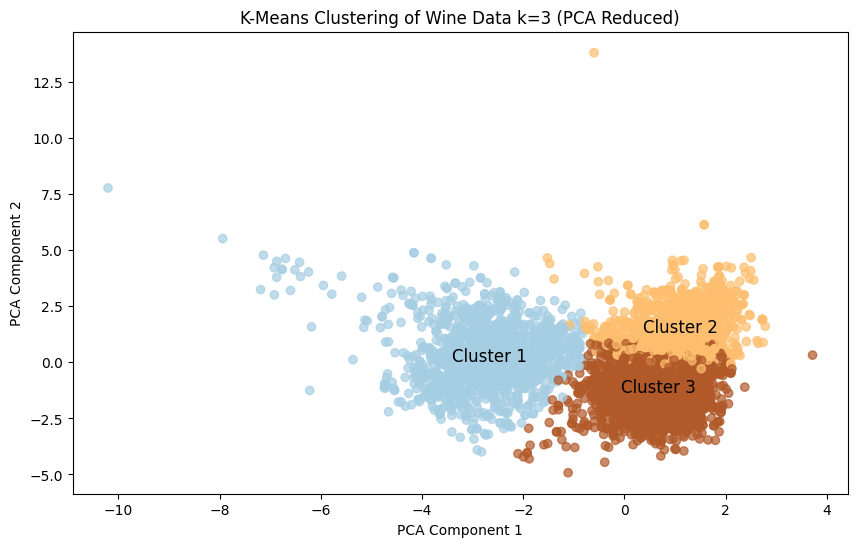

In [77]:
#Choose k=3
kmeans = KMeans(n_clusters=3, n_init=10, random_state=3523523)
assigned_clusters = kmeans.fit_predict(X_scaled)
# Do PCA down to 2D for visualization
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
print(f'Explained variance by PCA components: {np.sum(pca.explained_variance_ratio_)}')
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=assigned_clusters, cmap='Paired', alpha=0.7)
plt.title('K-Means Clustering of Wine Data k=3 (PCA Reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
# Label the clusters
for i in range(4):
    plt.text(X_pca[assigned_clusters == i, 0].mean(), 
             X_pca[assigned_clusters == i, 1].mean(), 
             f'Cluster {i+1}', 
             color='black', fontsize=12, ha='center', va='center')
plt.savefig('kmeans_clustering_pca_k3.png', dpi=300, bbox_inches='tight')
plt.show()

In [78]:
# Compare cluster average values: (features, quality and color) to just splitting by color
cluster_means = pd.DataFrame(X,columns=X.columns).groupby(assigned_clusters).mean()
y_df = pd.DataFrame(y, columns=["quality"])
cluster_means['quality'] = pd.DataFrame(y_df, columns=["quality"]).groupby(assigned_clusters).mean()
cluster_means['color'] = pd.DataFrame(color, columns=["color"]).groupby(assigned_clusters).mean()

In [79]:
# round the values to 2 decimal places also give me a seperate table showing the mean and std for each feature and save the table
cluster_means = cluster_means.round(2)
# Save table
cluster_means.to_csv('cluster_means.csv')
# give me a table showing the mean and std for each feature in dataset
mean_std_table = pd.DataFrame({
    'Mean': X.mean(),
    'Std': X.std()
})
mean_std_table.to_csv('mean_std_table.csv')
cluster_means

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,8.38,0.53,0.27,2.53,0.09,0.38,46.29,1.00,3.31,0.66,10.36,5.61,0.02
1,7.01,0.28,0.36,11.20,0.05,0.26,167.29,1.00,3.15,0.49,9.53,5.61,1.00
2,6.74,0.27,0.32,3.31,0.04,0.25,119.22,0.99,3.21,0.49,11.17,6.05,0.98


In [80]:
# base code
import numpy as np
import seaborn as sns
from statsmodels.tools.tools import maybe_unwrap_results
from statsmodels.graphics.gofplots import ProbPlot
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
from typing import Type

style_talk = 'seaborn-talk'    #refer to plt.style.available

class LinearRegDiagnostic():
    """
    Diagnostic plots to identify potential problems in a linear regression fit.
    Mainly,
        a. non-linearity of data
        b. Correlation of error terms
        c. non-constant variance
        d. outliers
        e. high-leverage points
        f. collinearity

    Authors:
        Prajwal Kafle (p33ajkafle@gmail.com, where 3 = r)
        Does not come with any sort of warranty.
        Please test the code one your end before using.

        Matt Spinelli (m3spinelli@gmail.com, where 3 = r)
        (1) Fixed incorrect annotation of the top most extreme residuals in
            the Residuals vs Fitted and, especially, the Normal Q-Q plots.
        (2) Changed Residuals vs Leverage plot to match closer the y-axis
            range shown in the equivalent plot in the R package ggfortify.
        (3) Added horizontal line at y=0 in Residuals vs Leverage plot to
            match the plots in R package ggfortify and base R.
        (4) Added option for placing a vertical guideline on the Residuals
            vs Leverage plot using the rule of thumb of h = 2p/n to denote
            high leverage (high_leverage_threshold=True).
        (5) Added two more ways to compute the Cook's Distance (D) threshold:
            * 'baseR': D > 1 and D > 0.5 (default)
            * 'convention': D > 4/n
            * 'dof': D > 4 / (n - k - 1)
        (6) Fixed class name to conform to Pascal casing convention
        (7) Fixed Residuals vs Leverage legend to work with loc='best'
    """

    def __init__(self,
                 results: Type[statsmodels.regression.linear_model.RegressionResultsWrapper]) -> None:
        """
        For a linear regression model, generates following diagnostic plots:

        a. residual
        b. qq
        c. scale location and
        d. leverage

        and a table

        e. vif

        Args:
            results (Type[statsmodels.regression.linear_model.RegressionResultsWrapper]):
                must be instance of statsmodels.regression.linear_model object

        Raises:
            TypeError: if instance does not belong to above object

        Example:
        >>> import numpy as np
        >>> import pandas as pd
        >>> import statsmodels.formula.api as smf
        >>> x = np.linspace(-np.pi, np.pi, 100)
        >>> y = 3*x + 8 + np.random.normal(0,1, 100)
        >>> df = pd.DataFrame({'x':x, 'y':y})
        >>> res = smf.ols(formula= "y ~ x", data=df).fit()
        >>> cls = Linear_Reg_Diagnostic(res)
        >>> cls(plot_context="seaborn-v0_8-paper")

        In case you do not need all plots you can also independently make an individual plot/table
        in following ways

        >>> cls = Linear_Reg_Diagnostic(res)
        >>> cls.residual_plot()
        >>> cls.qq_plot()
        >>> cls.scale_location_plot()
        >>> cls.leverage_plot()
        >>> cls.vif_table()
        """

        if isinstance(results, statsmodels.regression.linear_model.RegressionResultsWrapper) is False:
            raise TypeError("result must be instance of statsmodels.regression.linear_model.RegressionResultsWrapper object")

        self.results = maybe_unwrap_results(results)

        self.y_true = self.results.model.endog
        self.y_predict = self.results.fittedvalues
        self.xvar = self.results.model.exog
        self.xvar_names = self.results.model.exog_names

        self.residual = np.array(self.results.resid)
        influence = self.results.get_influence()
        self.residual_norm = influence.resid_studentized_internal
        self.leverage = influence.hat_matrix_diag
        self.cooks_distance = influence.cooks_distance[0]
        self.nparams = len(self.results.params)
        self.nresids = len(self.residual_norm)

    def __call__(self, plot_context='seaborn-v0_8-paper', **kwargs):
        # print(plt.style.available)
        # GH#9157
        if plot_context not in plt.style.available:
            plot_context = 'default'
        with plt.style.context(plot_context):
            fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
            self.residual_plot(ax=ax[0,0])
            self.qq_plot(ax=ax[0,1])
            self.scale_location_plot(ax=ax[1,0])
            self.leverage_plot(
                ax=ax[1,1],
                high_leverage_threshold = kwargs.get('high_leverage_threshold'),
                cooks_threshold = kwargs.get('cooks_threshold'))
            plt.show()

        return self.vif_table(), fig, ax,

    def residual_plot(self, ax=None):
        """
        Residual vs Fitted Plot

        Graphical tool to identify non-linearity.
        (Roughly) Horizontal red line is an indicator that the residual has a linear pattern
        """
        if ax is None:
            fig, ax = plt.subplots()

        sns.residplot(
            x=self.y_predict,
            y=self.residual,
            lowess=True,
            scatter_kws={'alpha': 0.5},
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
            ax=ax)

        # annotations
        residual_abs = np.abs(self.residual)
        abs_resid = np.flip(np.argsort(residual_abs), 0)
        abs_resid_top_3 = abs_resid[:3]
        for i in abs_resid_top_3:
            ax.annotate(
                i,
                xy=(self.y_predict[i], self.residual[i]),
                color='C3')

        ax.set_title('Residuals vs Fitted', fontweight="bold")
        ax.set_xlabel('Fitted values')
        ax.set_ylabel('Residuals')
        return ax

    def qq_plot(self, ax=None):
        """
        Standarized Residual vs Theoretical Quantile plot

        Used to visually check if residuals are normally distributed.
        Points spread along the diagonal line will suggest so.
        """
        if ax is None:
            fig, ax = plt.subplots()

        QQ = ProbPlot(self.residual_norm)
        fig = QQ.qqplot(line='45', alpha=0.5, lw=1, ax=ax)

        # annotations
        abs_norm_resid = np.flip(np.argsort(np.abs(self.residual_norm)), 0)
        abs_norm_resid_top_3 = abs_norm_resid[:3]
        for i, x, y in self.__qq_top_resid(QQ.theoretical_quantiles, abs_norm_resid_top_3):
            ax.annotate(
                i,
                xy=(x, y),
                ha='right',
                color='C3')

        ax.set_title('Normal Q-Q', fontweight="bold")
        ax.set_xlabel('Theoretical Quantiles')
        ax.set_ylabel('Standardized Residuals')
        return ax

    def scale_location_plot(self, ax=None):
        """
        Sqrt(Standarized Residual) vs Fitted values plot

        Used to check homoscedasticity of the residuals.
        Horizontal line will suggest so.
        """
        if ax is None:
            fig, ax = plt.subplots()

        residual_norm_abs_sqrt = np.sqrt(np.abs(self.residual_norm))

        ax.scatter(self.y_predict, residual_norm_abs_sqrt, alpha=0.5);
        sns.regplot(
            x=self.y_predict,
            y=residual_norm_abs_sqrt,
            scatter=False, ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
            ax=ax)

        # annotations
        abs_sq_norm_resid = np.flip(np.argsort(residual_norm_abs_sqrt), 0)
        abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]
        for i in abs_sq_norm_resid_top_3:
            ax.annotate(
                i,
                xy=(self.y_predict[i], residual_norm_abs_sqrt[i]),
                color='C3')

        ax.set_title('Scale-Location', fontweight="bold")
        ax.set_xlabel('Fitted values')
        ax.set_ylabel(r'$\sqrt{|\mathrm{Standardized\ Residuals}|}$');
        return ax

    def leverage_plot(self, ax=None, high_leverage_threshold=False, cooks_threshold='baseR'):
        """
        Residual vs Leverage plot

        Points falling outside Cook's distance curves are considered observation that can sway the fit
        aka are influential.
        Good to have none outside the curves.
        """
        if ax is None:
            fig, ax = plt.subplots()

        ax.scatter(
            self.leverage,
            self.residual_norm,
            alpha=0.5);

        sns.regplot(
            x=self.leverage,
            y=self.residual_norm,
            scatter=False,
            ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
            ax=ax)

        # annotations
        leverage_top_3 = np.flip(np.argsort(self.cooks_distance), 0)[:3]
        for i in leverage_top_3:
            ax.annotate(
                i,
                xy=(self.leverage[i], self.residual_norm[i]),
                color = 'C3')

        factors = []
        if cooks_threshold == 'baseR' or cooks_threshold is None:
            factors = [1, 0.5]
        elif cooks_threshold == 'convention':
            factors = [4/self.nresids]
        elif cooks_threshold == 'dof':
            factors = [4/ (self.nresids - self.nparams)]
        else:
            raise ValueError("threshold_method must be one of the following: 'convention', 'dof', or 'baseR' (default)")
        for i, factor in enumerate(factors):
            label = "Cook's distance" if i == 0 else None
            xtemp, ytemp = self.__cooks_dist_line(factor)
            ax.plot(xtemp, ytemp, label=label, lw=1.25, ls='--', color='red')
            ax.plot(xtemp, np.negative(ytemp), lw=1.25, ls='--', color='red')

        if high_leverage_threshold:
            high_leverage = 2 * self.nparams / self.nresids
            if max(self.leverage) > high_leverage:
                ax.axvline(high_leverage, label='High leverage', ls='-.', color='purple', lw=1)

        ax.axhline(0, ls='dotted', color='black', lw=1.25)
        ax.set_xlim(0, max(self.leverage)+0.01)
        ax.set_ylim(min(self.residual_norm)-0.1, max(self.residual_norm)+0.1)
        ax.set_title('Residuals vs Leverage', fontweight="bold")
        ax.set_xlabel('Leverage')
        ax.set_ylabel('Standardized Residuals')
        plt.legend(loc='best')
        return ax

    def vif_table(self):
        """
        VIF table

        VIF, the variance inflation factor, is a measure of multicollinearity.
        VIF > 5 for a variable indicates that it is highly collinear with the
        other input variables.
        """
        vif_df = pd.DataFrame()
        vif_df["Features"] = self.xvar_names
        vif_df["VIF Factor"] = [variance_inflation_factor(self.xvar, i) for i in range(self.xvar.shape[1])]

        return (vif_df
                .sort_values("VIF Factor")
                .round(2))


    def __cooks_dist_line(self, factor):
        """
        Helper function for plotting Cook's distance curves
        """
        p = self.nparams
        formula = lambda x: np.sqrt((factor * p * (1 - x)) / x)
        x = np.linspace(0.001, max(self.leverage), 50)
        y = formula(x)
        return x, y


    def __qq_top_resid(self, quantiles, top_residual_indices):
        """
        Helper generator function yielding the index and coordinates
        """
        offset = 0
        quant_index = 0
        previous_is_negative = None
        for resid_index in top_residual_indices:
            y = self.residual_norm[resid_index]
            is_negative = y < 0
            if previous_is_negative == None or previous_is_negative == is_negative:
                offset += 1
            else:
                quant_index -= offset
            x = quantiles[quant_index] if is_negative else np.flip(quantiles, 0)[quant_index]
            quant_index += 1
            previous_is_negative = is_negative
            yield resid_index, x, y

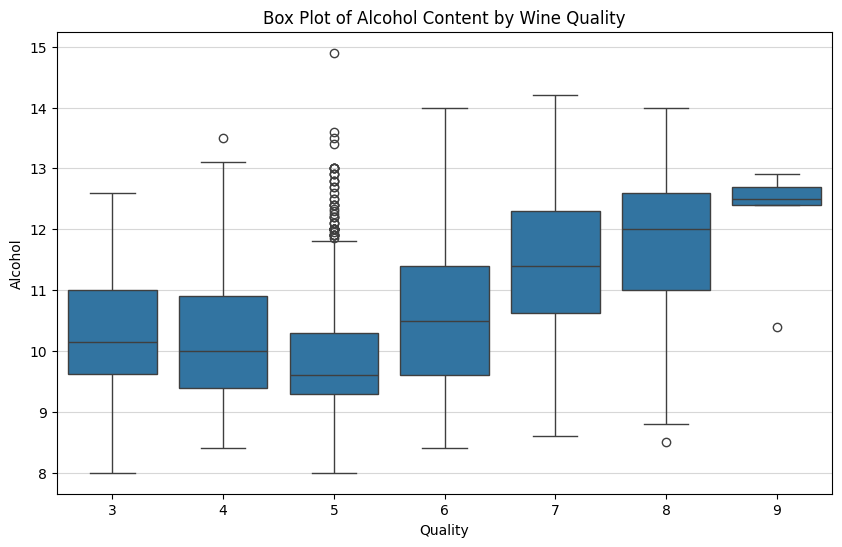

In [81]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=y, y=X['alcohol'])
plt.xlabel('Quality')
plt.ylabel('Alcohol')
plt.title('Box Plot of Alcohol Content by Wine Quality')
plt.grid(axis='y', alpha=0.5)
plt.savefig('boxplot_alcohol_by_quality.png', dpi=300, bbox_inches='tight')
plt.show()

In [82]:
#change group 8 as 8+ and add samples with quality > 8
X['quality_group'] = np.where(y > 8, 8, y)

C:\Users\Çağan\AppData\Local\Temp\ipykernel_6680\2194950944.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)


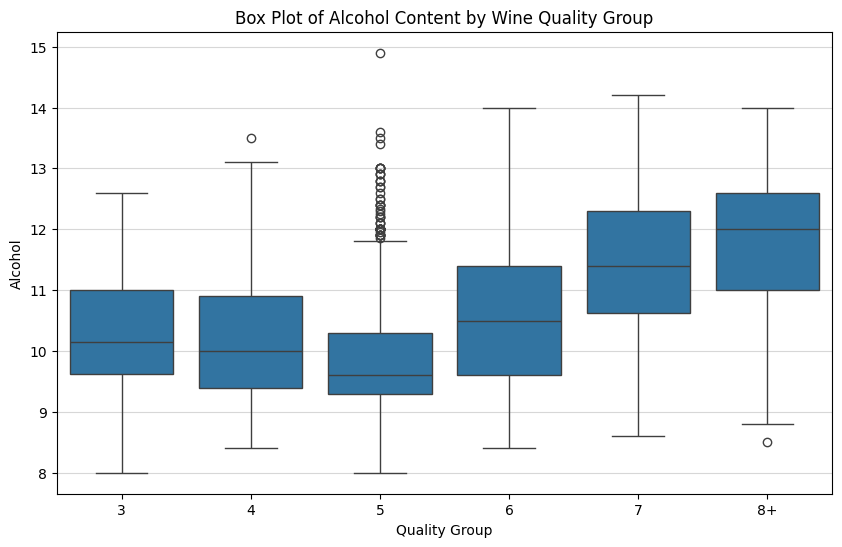

In [83]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=X['quality_group'], y=X['alcohol'])
plt.xlabel('Quality Group')
plt.ylabel('Alcohol')
plt.title('Box Plot of Alcohol Content by Wine Quality Group')

# Change the x-axis labels to show 8 as 8+
ax = plt.gca()
labels = [item.get_text() for item in ax.get_xticklabels()]
labels = [label if label != '8' else '8+' for label in labels]
ax.set_xticklabels(labels)

plt.grid(axis='y', alpha=0.5)
plt.savefig('boxplot_alcohol_by_quality_group.png', dpi=300, bbox_inches='tight')
plt.show()

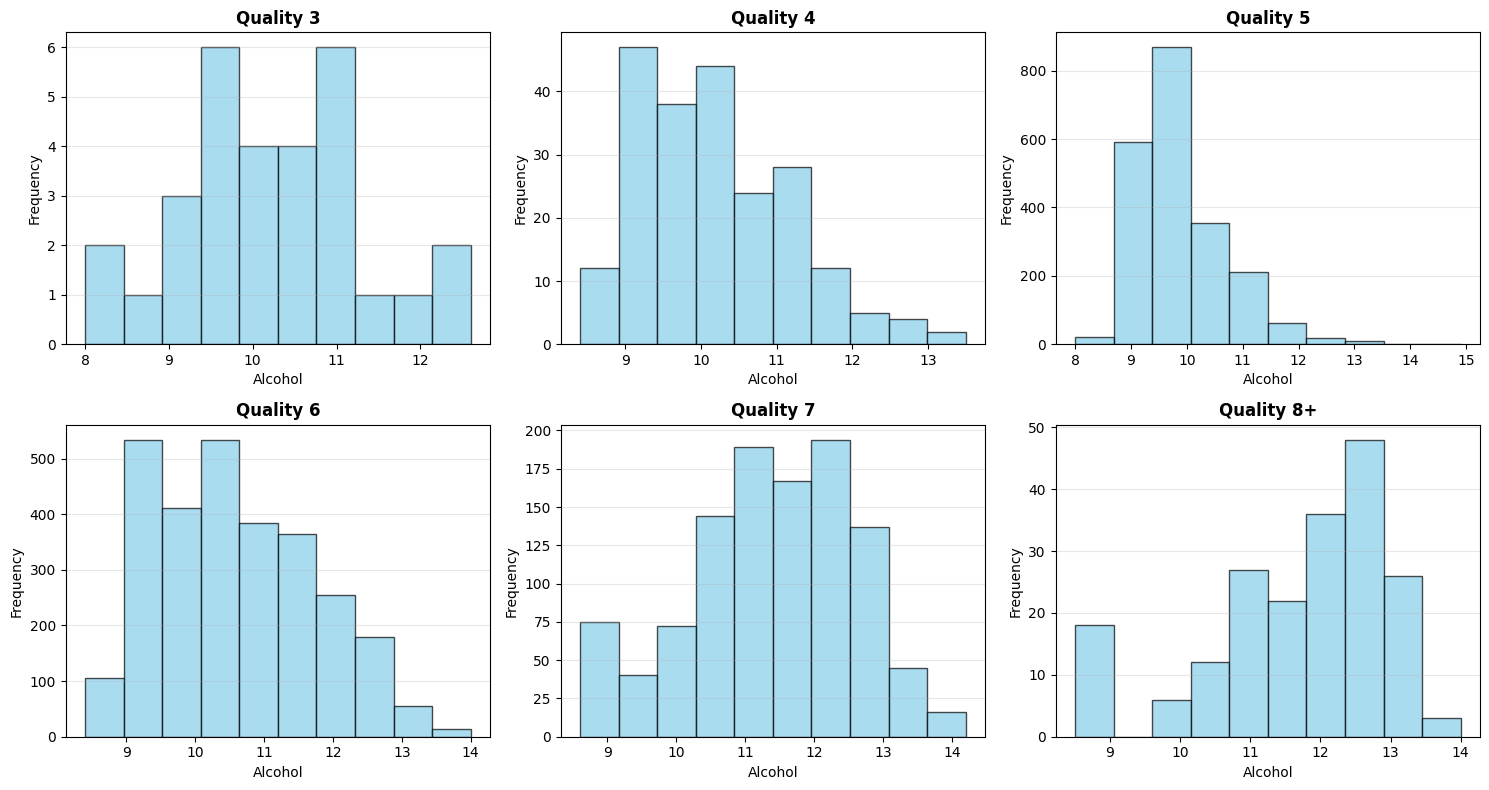

In [84]:
# Create histograms for alcohol content by quality group
qualities = sorted(X['quality_group'].unique())
num_qualities = len(qualities)
num_cols = 3
num_rows = (num_qualities + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 4))
axes = axes.flatten() if num_qualities > 1 else [axes]

for i, quality in enumerate(qualities):
    alcohol_values = X[X['quality_group'] == quality]['alcohol']
    
    axes[i].hist(alcohol_values, bins=10, alpha=0.7, color='skyblue', edgecolor='black')
    
    # Rename quality 8 to 8+ in the title
    title_quality = '8+' if quality == 8 else str(quality)
    axes[i].set_title(f'Quality {title_quality}', fontweight='bold')
    axes[i].set_xlabel('Alcohol')
    axes[i].set_ylabel('Frequency')
    axes[i].grid(axis='y', alpha=0.3)

# Hide empty subplots
for j in range(num_qualities, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.savefig('alcohol_histograms_by_quality_group.png', dpi=300, bbox_inches='tight')
plt.show()

In [90]:
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.formula.api import ols

import statsmodels.api as sm

# Prepare data for ANOVA
df_anova = pd.DataFrame({'alcohol': X['alcohol'], 'quality': X["quality_group"]})

# Perform one-way ANOVA
model = ols('alcohol ~ C(quality)', data=df_anova).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print("ANOVA Results:")
print("=" * 50)
print(anova_table)
print(f"\nF-statistic: {anova_table.loc['C(quality)', 'F']:.4f}")
print(f"P-value: {anova_table.loc['C(quality)', 'PR(>F)']:.4e}")

# put anova results into a dataframe
anova_results_df = pd.DataFrame({
    'F-statistic': [anova_table.loc['C(quality)', 'F']],
    'P-value': [anova_table.loc['C(quality)', 'PR(>F)']]
})
# round the results to 4 decimal places
anova_results_df = anova_results_df.round(4)
# save the anova results to a csv file
anova_results_df.to_csv('anova_results.csv', index=False)

# Interpret ANOVA results
alpha = 0.05
if anova_table.loc['C(quality)', 'PR(>F)'] < alpha:
    print(f"\nANOVA Result: There are significant differences in alcohol content between quality groups (p < {alpha})")
else:
    print(f"\nANOVA Result: No significant differences in alcohol content between quality groups (p >= {alpha})")

# Perform Tukey HSD post-hoc test
tukey_results = pairwise_tukeyhsd(endog=df_anova['alcohol'], groups=df_anova['quality'], alpha=0.05)

# Create a summary table of the Tukey results
tukey_summary = pd.DataFrame(data=tukey_results._results_table.data[1:], 
                            columns=tukey_results._results_table.data[0])
# save the Tukey summary table to a CSV file
tukey_summary = tukey_summary.round(4)
#put  < 0.01 in the p-adj column
tukey_summary['p-adj'] = tukey_summary['p-adj'].apply(lambda x: '< 0.01' if x < 0.01 else f'{x:.4f}')
# turn meandiff into percentage difference
tukey_summary.to_csv('tukey_hsd_results.csv', index=False)
tukey_summary

ANOVA Results:
                 sum_sq      df          F  PR(>F)
C(quality)  2111.500986     5.0  384.48236     0.0
Residual    7129.457322  6491.0        NaN     NaN

F-statistic: 384.4824
P-value: 0.0000e+00

ANOVA Result: There are significant differences in alcohol content between quality groups (p < 0.05)


,group1,group2,meandiff,p-adj,lower,upper,reject
0,3,4,-0.0349,1.0000,-0.6170,0.5472,False
1,3,5,-0.3772,0.3671,-0.9265,0.1720,False
2,3,6,0.3726,0.3796,-0.1758,0.9209,False
3,3,7,1.1710,< 0.01,0.6180,1.7240,True
4,3,8,1.4764,< 0.01,0.8911,2.0617,True
5,4,5,-0.3423,< 0.01,-0.5556,-0.1290,True
6,4,6,0.4075,< 0.01,0.1966,0.6183,True
7,4,7,1.2059,< 0.01,0.9832,1.4286,True
8,4,8,1.5113,< 0.01,1.2174,1.8053,True
9,5,6,0.7498,< 0.01,0.6642,0.8353,True
